In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-6

**Note:**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.



## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

## Problem 1
How many samples are there in the dataset?



## Solution

In [4]:
# Write your solution code here
X.shape[0]

442

## Problem 2

How many features are there in the dataset?



## Solution

In [5]:
# Write your solution code here
X.shape[1]

10

## Problem 3
Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$.

Note that it should shuffle the data pairs $(x_i, y_i)$.

What will be the mean of the first 5 values in $y$?



In [6]:
# Write your solution code here
def shuffle_data(X, y):
    assert len(X) == len(y)
    indices = np.random.permutation(len(X))  # Generate a permutation of indices
    return X[indices], y[indices]

X_shuffled, y_shuffled = shuffle_data(X, y)
mean_first_5_y = np.mean(y_shuffled[:5])
print("Mean of first 5 values in y after shuffle:", mean_first_5_y)

Mean of first 5 values in y after shuffle: 180.4


## Problem 4

Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.

Set the test_size to be 0.25 and output the sum of all y values settling in $y_{test}$.








In [7]:
# Write your solution code here

def train_test_split(X, y, test_size):
    assert 0 < test_size < 1, "test_size must be between 0 and 1"
    assert len(X) == len(y), "X and y must have the same length"

    # Shuffle the data first
    X_shuffled, y_shuffled = shuffle_data(X, y)

    n_samples = len(X)
    test_count = int(test_size * n_samples)

    X_test = X_shuffled[:test_count]
    y_test = y_shuffled[:test_count]
    X_train = X_shuffled[test_count:]
    y_train = y_shuffled[test_count:]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
sum_y_test = np.sum(y_test)
print("Sum of y_test values:", sum_y_test)


Sum of y_test values: 17178.0


## Problem 5

What are the shapes of $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively?



In [8]:
# Write your solution code here
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(332, 10)
(110, 10)
(332,)
(110,)


## Problem 6
Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.

What are the shapes of $X_{train}$ and $X_{test}$?



In [9]:
# Write your solution code here
def add_dummy_and_transpose(X_train, X_test):
    # Add dummy feature (column of 1's) to the beginning
    ones_train = np.ones((X_train.shape[0], 1))
    ones_test = np.ones((X_test.shape[0], 1))

    X_train_new = np.hstack((ones_train, X_train))
    X_test_new = np.hstack((ones_test, X_test))

    # Transpose
    X_train_T = X_train_new.T
    X_test_T = X_test_new.T

    return X_train_T, X_test_T

X_train_T, X_test_T = add_dummy_and_transpose(X_train, X_test)
print("Shape of X_train:", X_train_T.shape)
print("Shape of X_test:", X_test_T.shape)

Shape of X_train: (11, 332)
Shape of X_test: (11, 110)


## Problem 7

Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.

Call this function by passing $X_{train}$ and $y_{train}$. As the dummy feature was added as the first column, the first value in the weight vector will be the intercept. What is its value (rounded to one decimal place)?



In [10]:
# Write your solution code here
def compute_weights(X, y):
    # X: shape (d, n), y: shape (n,)
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)  # reshape to (n, 1)

    # Closed-form linear regression solution
    XtX_inv = np.linalg.inv(X @ X.T)
    w = XtX_inv @ X @ y  # shape: (d, 1)

    return w.flatten()  # return as 1D array for easier reading

weights = compute_weights(X_train_T, y_train)
intercept = round(weights[0], 1)
print("Intercept (rounded to 1 decimal place):", intercept)


Intercept (rounded to 1 decimal place): 151.7


## Problem 8

Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.

Using this function, compute the train error and test error.

Note: Here `y` is the true `y` for `X`.

Compute both train and test error.

What is the value of test error?


In [11]:
# Write your solution code here

def MSE(X, y, w):
    # X: shape (d, n), w: shape (d,), y: shape (n,)
    X = np.array(X)
    y = np.array(y).reshape(-1)
    w = np.array(w).reshape(-1)

    y_pred = X.T @ w  # shape: (n,)
    mse = np.mean((y - y_pred) ** 2)
    return mse

train_error = MSE(X_train_T, y_train, weights)
test_error = MSE(X_test_T, y_test, weights)

print("Train error (MSE):", train_error)
print("Test error (MSE):", test_error)


Train error (MSE): 2831.7294119891767
Test error (MSE): 2997.103525879682


## Problem 9

Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.

Call this function by passing  `X_train`, `y_train` and 0.3 as the value of regularization strength.


Find the sum of values in the weight vector obtained. How much reduction in total sum of weights is achieved with respect to the the weight vector obtained from 'plain' linear regression (without regularization) computed earlier.


In [12]:
# Write your solution code here

def compute_weights_ridge(X, y, lambda_):
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    d = X.shape[0]

    I = np.eye(d)
    XtX_lambda = X @ X.T + lambda_ * I
    w_ridge = np.linalg.inv(XtX_lambda) @ X @ y
    return w_ridge.flatten()


lambda_ = 0.3
weights_ridge = compute_weights_ridge(X_train_T, y_train, lambda_)

# Compare sum of weights
sum_plain = np.sum(weights)
sum_ridge = np.sum(weights_ridge)

reduction = sum_plain - sum_ridge

print("Sum of plain weights:", sum_plain)
print("Sum of ridge weights:", sum_ridge)
print("Reduction in total sum of weights:", reduction)


Sum of plain weights: 1683.622703630017
Sum of ridge weights: 1005.0193562884089
Reduction in total sum of weights: 678.6033473416081


## Problem 10

Compute the train error and test error. What is their absolute difference?



In [13]:
# Write your solution code here

# Get Ridge weights
weights_ridge = compute_weights_ridge(X_train_T, y_train, lambda_=0.3)

# Compute errors
train_error_ridge = MSE(X_train_T, y_train, weights_ridge)
test_error_ridge = MSE(X_test_T, y_test, weights_ridge)

# Compute absolute difference
abs_diff = abs(train_error_ridge - test_error_ridge)

print("Train error (Ridge):", train_error_ridge)
print("Test error (Ridge):", test_error_ridge)
print("Absolute difference:", abs_diff)


Train error (Ridge): 2984.3059851079774
Test error (Ridge): 3047.386380756701
Absolute difference: 63.080395648723425


## Problem 11

Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector.

Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.



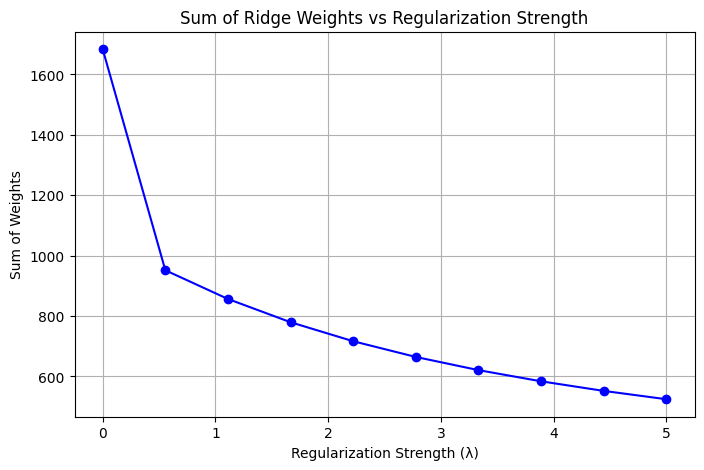

In [14]:
# Write your solution code here
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 10 values between 0 and 5
lambdas = np.linspace(0, 5, 10)

# Step 2–3: Compute Ridge weights and their sum
weight_sums = []

for lam in lambdas:
    w_ridge = compute_weights_ridge(X_train_T, y_train, lambda_=lam)
    weight_sums.append(np.sum(w_ridge))

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.plot(lambdas, weight_sums, marker='o', linestyle='-', color='b')
plt.title("Sum of Ridge Weights vs Regularization Strength")
plt.xlabel("Regularization Strength (λ)")
plt.ylabel("Sum of Weights")
plt.grid(True)
plt.show()
